In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from pathlib import Path
import pickle

from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import FunctionTransformer, OneHotEncoder

from sklearn import set_config; set_config(display='diagram')


In [6]:
path = "../../raw_data/bert_prediction_tests.csv"
df = pd.read_csv(path)
df.columns

Index(['Unnamed: 0', 'text', 'generated', 'number_of_test',
       'number_of_correct_prediction', 'pourcentage_of_correct_prediction'],
      dtype='object')

<Axes: xlabel='generated', ylabel='pourcentage_of_correct_prediction'>

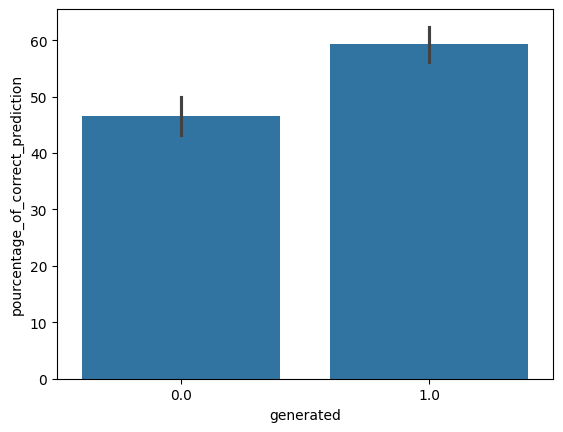

In [11]:
sns.barplot(data=df, x="generated", y="pourcentage_of_correct_prediction")

In [14]:
df[['generated', 'pourcentage_of_correct_prediction', 'number_of_test']].corr()


,generated,pourcentage_of_correct_prediction,number_of_test
generated,1.000000,0.468354,-0.149839
pourcentage_of_correct_prediction,0.468354,1.000000,-0.106117
number_of_test,-0.149839,-0.106117,1.000000
